In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Initializing data from csv
df = pd.read_csv(
    "../data/yfinance_nvda.csv", 
    skiprows=3, #skipping filler label rows
    names=["Date","Close","High","Low","Open","Volume"], # Redefining column names for future use (prices are adjusted)
    parse_dates=True,
    index_col=0)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test to test if series is stationary
def adf_test(series):
    result = adfuller(series.dropna())
    p_value = result[1]
    return p_value

# Running test on raw adjusted close values
pval = adf_test(df["Close"])
stationary = pval < 0.05
print(f"Is the Adj Close stationary? {stationary}, p-value = {pval:.4f}")


Is the Adj Close stationary? False, p-value = 0.9846


In [ ]:
#Differentiating series if not stationary
if stationary == False:
    df["Adj Close Diff"] = df["Close"].diff()
    pval_diff = adf_test(df["Adj Close Diff"])
    stationary_diff = pval_diff < 0.05
    print(f"Differenced series stationary? {stationary_diff}, p-value = {pval_diff:.4f}")


Differenced series stationary? True, p-value = 0.0000


<Figure size 1200x400 with 0 Axes>

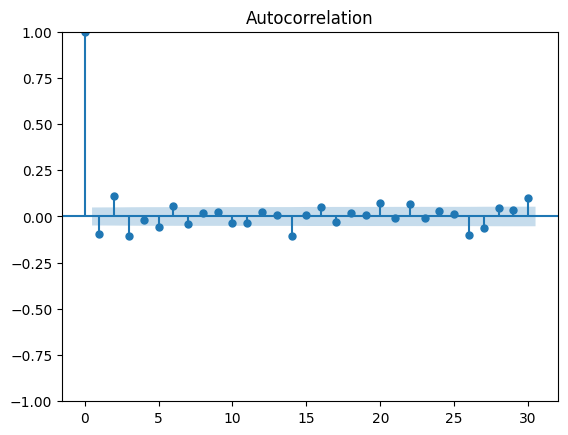

<Figure size 1200x400 with 0 Axes>

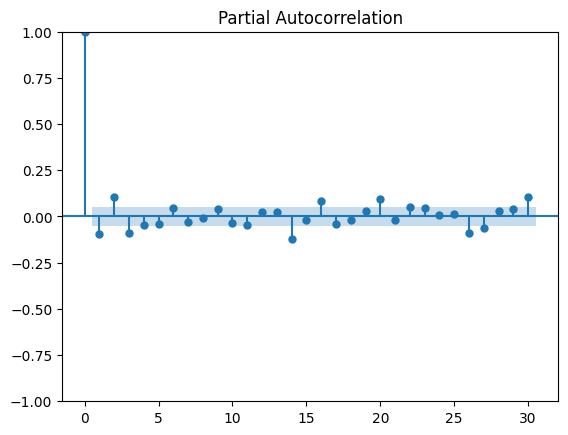

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 4))
plot_acf(df["Adj Close Diff"].dropna(), lags=30)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(df["Adj Close Diff"].dropna(), lags=30)
plt.show()